# Задание

Данные по клиентам заархивированы в формате zip - сразу их разархивируем. Для этого нам понадобится библиотека zipfile.

In [2]:
import zipfile

import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
with zipfile.ZipFile('../datasets/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../datasets')

In [4]:
df = pd.read_csv('../datasets/client_info.csv')

In [15]:
df.head(5)
df['CLNT_JOB_POSITION'].value_counts().shape

(9719,)

## Задание 1
Назначь колонку `ID` индексом таблицы.

In [5]:
df.set_index('ID', inplace=True)

## Задание 2
Определимся, что является нашим `X`, а что является нашим `Y`. 
Для этого изучи документ, описывающий [датасет](../datasets/datadata_description.docs).
Признаки сохрани в переменную `X`. А целевую переменную, которую мы будем предсказывать, в переменную `Y`
Выведи размерность этих таблиц

In [6]:
X = df.drop('TARGET', axis=1)
Y = pd.DataFrame(df['TARGET'])
print(X.shape, Y.shape)

(355190, 103) (355190, 1)


## Задание 3
Изначальный датасет содержит в себе как количественные, так и категориальные переменные. Раздели датасет. 
В этом поможет тип данных колонки. Категориальные переменные сохрани в переменную `X_cat`, а количественные в `X_num`. 
Выведи число категориальных и количественные переменных.

In [7]:
X_cat = X.select_dtypes('object')
X_num = X.select_dtypes(['int64', 'float64'])
print(X_num.shape, X_cat.shape)

(355190, 47) (355190, 56)


## Задание 4
Предобработаем количественные переменные. Проведи стандартизацию для признаков X_num.
Сохрани результат стандартизации в переменную `X_num_scal`. 
Выведи среднее и стандартное отклонение по датасету для каждого признака после стандартизации. 
Значения округли для сотых.

In [8]:
X_num_scal = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_num), columns=X_num.columns.to_list())
# print(X_num_scal.mean(axis=0))
# print(X_num_scal.std(axis=0))
X_num_scal

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
0,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,2.356500,-0.169589,0.477531,-0.248485,-1.004598,...,-0.128283,-0.948052,-0.347604,-0.240313,-0.363365,-0.808123,-0.083103,-0.032303,-0.109613,-0.071988
1,-0.243932,0.016835,-0.044824,1.221828,-0.05133,-0.312371,-0.169589,-0.330458,-0.248485,1.446347,...,0.093638,-0.949882,-0.347604,-0.240313,-0.703305,-0.201842,-0.083103,-0.032303,-0.109613,-0.071988
2,-0.243932,-0.313313,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.247411,-0.248485,-1.004598,...,0.114617,-0.949882,-0.347604,-0.240313,-0.684133,-1.286775,-0.083103,-0.032303,-0.109613,-0.071988
3,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.283428,-0.169589,-0.124857,-0.248485,-1.004598,...,-1.461483,-0.951351,-0.347604,-0.240313,-0.098373,-0.143394,-0.083103,-0.032303,-0.109613,-0.071988
4,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.029532,-0.248485,-1.004598,...,0.328171,-0.951351,-0.347604,-0.240313,0.129454,0.127082,-0.083103,-0.032303,-0.109613,-0.071988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,-0.301613,-0.248485,-1.004598,...,0.263860,1.562006,-0.347604,-0.240313,0.311241,0.848562,-0.083103,-0.032303,-0.109613,-0.071988
355186,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,1.927086,2.804227,-1.004598,...,-0.278776,1.562006,-0.347604,-0.240313,0.286606,-0.400568,-0.083103,-0.032303,-0.109613,-0.071988
355187,-0.243932,0.019401,-0.044824,0.119528,-0.05133,-0.312371,-0.169589,0.843853,0.113815,0.135764,...,-0.112929,1.562922,-0.347604,-0.240313,-0.496155,-0.577500,-0.083103,-0.032303,-0.109613,-0.071988
355188,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,-0.288932,3.034981,-1.004598,...,1.553578,1.562922,-0.347604,-0.240313,1.618084,1.785410,-0.083103,-0.032303,-0.109613,-0.071988


## Задание 5
Алгоритмы машинного обучения плохо работают с категориальными признаками, поэтому их надо трансформировать. 
Прочитай про One-Hot Encoding подход к кодированию и примени его с нашим категориальным признаком, сохрани 
результат в переменную `X_cat_ohe`
Перед этим удали признак `CLNT_JOB_POSITION` (у него слишком много значений).
Выведи количество колонок таблицы `X_cat_ohe`

In [18]:
# X_cat.drop('CLNT_JOB_POSITION', axis=1, inplace=True)
# X_cat_ohe = preprocessing.OneHotEncoder().fit_transform().toarray()
# X_cat_ohe.shape



new_list = []
for i in X_cat.columns:
    for j in X_cat[i].value_counts().index:
        new_list.append(f'{i}_{j}')
len(new_list)

X_cat_ohe = pd.DataFrame(preprocessing.OneHotEncoder().fit_transform(X_cat).toarray(), columns=new_list)
X_cat_ohe

,APP_REGISTR_RGN_CODE_неизвестна,APP_REGISTR_RGN_CODE_77,APP_REGISTR_RGN_CODE_54,APP_REGISTR_RGN_CODE_50,APP_REGISTR_RGN_CODE_66,APP_REGISTR_RGN_CODE_23,APP_REGISTR_RGN_CODE_78,APP_REGISTR_RGN_CODE_74,APP_REGISTR_RGN_CODE_24,APP_REGISTR_RGN_CODE_16,...,PACK_o01,PACK_105,PACK_107,PACK_103,PACK_104,PACK_301,PACK_101,PACK_109,PACK_m01,PACK_108
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
355188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Задание 6
Объедини 2 предобработанных датасета. Результат запиши в переменную `X_ready`. Сохрани датасет в папку `datasets/data_prepared.csv`
Подели получившийся датасет на `train` и `test`. Процент тестовой выборки: `20%`. Использовать параметр `random_state=21`.
Выведи размерность обучающей выборки X_train.


In [19]:
X_ready = pd.concat([X_num_scal, X_cat_ohe], axis=1)
# X_ready.to_csv('../datasets/data_prepared.csv')
train, test = np.split(X_ready, [int(.8*len(X_ready))])
train, test = train_test_split(X_ready, test_size=0.2, random_state=21)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=21)
# train.to_csv('../datasets/train.csv')
# test.to_csv('../datasets/test.csv')
train.shape

(284152, 370)

In [20]:
X_ready

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,PACK_o01,PACK_105,PACK_107,PACK_103,PACK_104,PACK_301,PACK_101,PACK_109,PACK_m01,PACK_108
0,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,2.356500,-0.169589,0.477531,-0.248485,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.243932,0.016835,-0.044824,1.221828,-0.05133,-0.312371,-0.169589,-0.330458,-0.248485,1.446347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.243932,-0.313313,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.247411,-0.248485,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.283428,-0.169589,-0.124857,-0.248485,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.029532,-0.248485,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,-0.301613,-0.248485,-1.004598,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355186,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,1.927086,2.804227,-1.004598,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355187,-0.243932,0.019401,-0.044824,0.119528,-0.05133,-0.312371,-0.169589,0.843853,0.113815,0.135764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
355188,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,-0.288932,3.034981,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Задание 7 
Обучи логистическую регрессию с параметрами: `solver='liblinear'`, `fit_intercept=False`, `penalty='l1'`, `random_state=21`. 
Посчитай `accuracy` модели на тестовой выборке, сравнив предсказанные значения с реальными.
Выведи значение `accuracy` модели на тестовой выборке.

In [21]:
clf = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21).fit(train, Y_train)

/opt/goinfre/changeli/DS_pool/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
clf.score(test, Y_test) * 100

91.97612545398238

## Задание 8
Посчитай процент клиентов в тестовой выборке, у которых индикатор оттока равен `0`, и сравнить с `accuracy`.
Тебе что-то должно показаться подозрительным)

In [23]:
(Y_test.value_counts()[0] * 100) / Y_test.count()

TARGET    91.960641
dtype: float64

## Задание 9
Построй график, на котором видны топ-10 самых важных факторов по мнению модели в абсолютном значении.

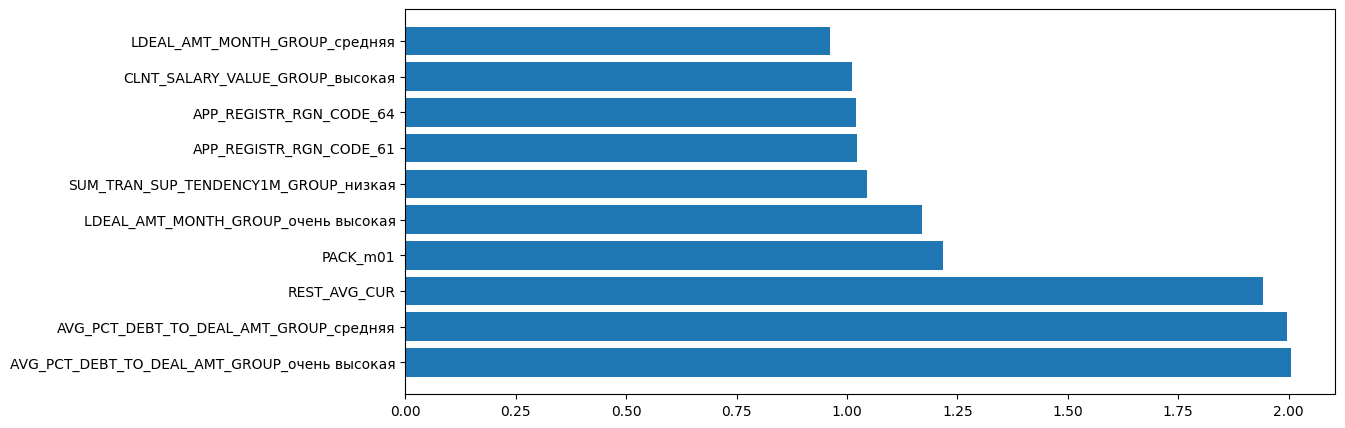

In [24]:
import matplotlib.pyplot as plt


def f_importances(weights, names, top=-1):
    weights, names = zip(*sorted(list(zip(weights, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12, 5))
    plt.barh(range(top), weights[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

f_importances(np.absolute(clf.coef_)[0], X_ready.columns, 10)

In [153]:
# clf.coef_.absolute()
# np.absolute(clf.coef_)[0].shape
# train.shape
# clf.coef

(103,)